In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the dataset
df = pd.read_csv('C:\\Users\\Usman\Desktop\\Insurance Classificaiton Project\\Insurance\\train.csv')

# Display the first few rows of the dataframe
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [2]:
# Inspect the data
df.info()

# Find categorical variables
categorical_vars = df.select_dtypes(include='object').columns
print('\nCategorical Variables:\n', categorical_vars)

# Find Numerical Variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
print('\nNumerical Variables:\n', numerical_vars)

# Check unique values and its frequency for each variable
for col in df.columns:
    print('\nUnique values for {}:\n'.format(col), df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [3]:
# Check for duplicated rows
duplicates = df.duplicated().sum()
print('Number of duplicate rows = ', duplicates)

# If there are duplicates, we will drop them
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print('\nMissing values for each column:\n', missing_values)


Number of duplicate rows =  0

Missing values for each column:
 policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type           

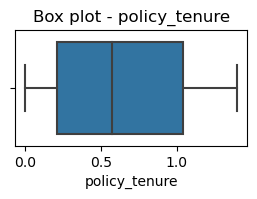

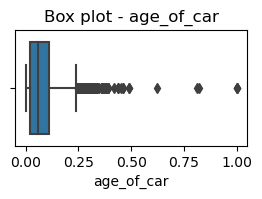

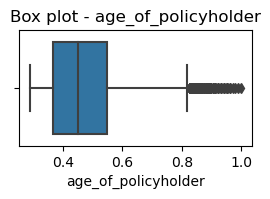

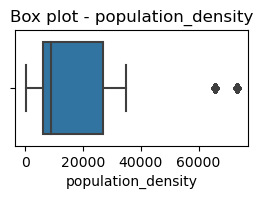

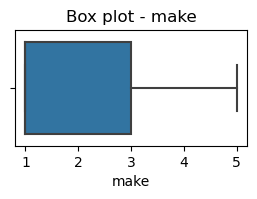

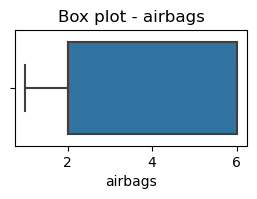

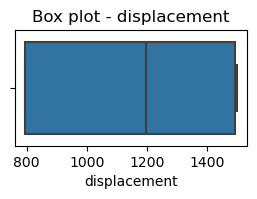

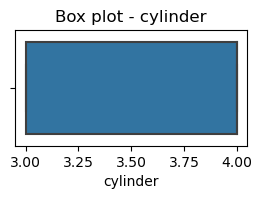

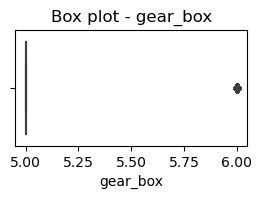

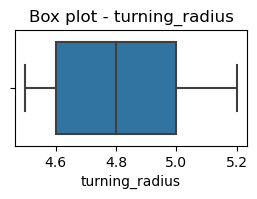

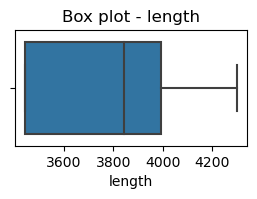

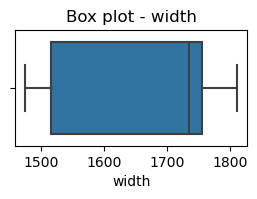

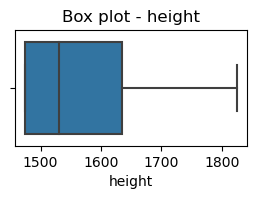

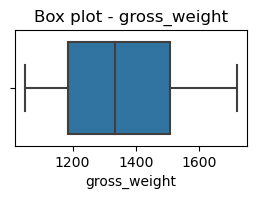

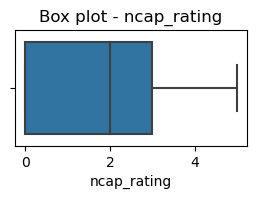

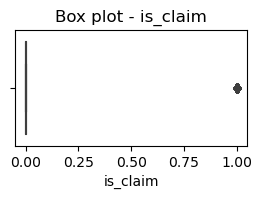

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make box plots for outlier inspection
for col in numerical_vars:
    plt.figure(figsize=(3, 1.5))
    sns.boxplot(x=df[col])
    plt.title('Box plot - {}'.format(col))
    plt.show()

# Exploratory Data Analysis

## Univariate Analysis

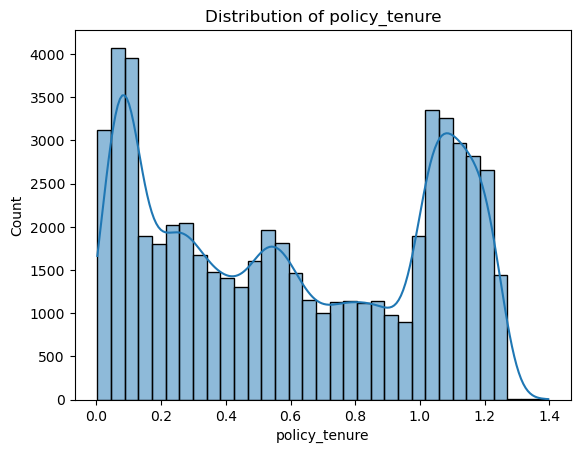

In [5]:
# policy_tenure
sns.histplot(df['policy_tenure'], kde=True)
plt.title('Distribution of policy_tenure')
plt.show()

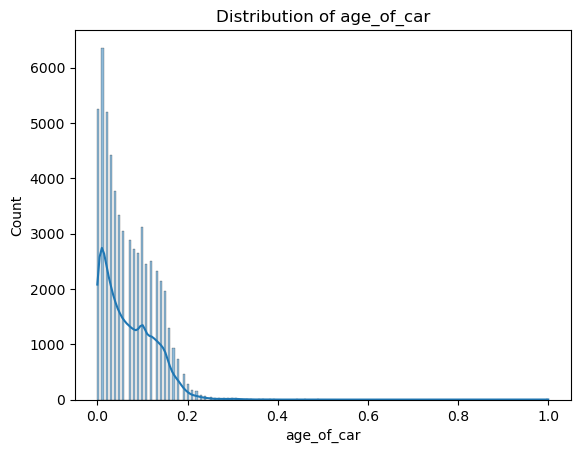

In [6]:
# age_of_car
sns.histplot(df['age_of_car'], kde=True)
plt.title('Distribution of age_of_car')
plt.show()

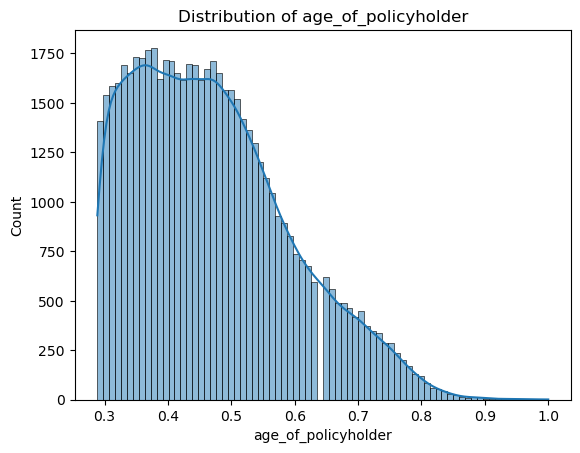

In [7]:
# age_of_policyholder
sns.histplot(df['age_of_policyholder'], kde=True)
plt.title('Distribution of age_of_policyholder')
plt.show()

## Bivariate Analysis

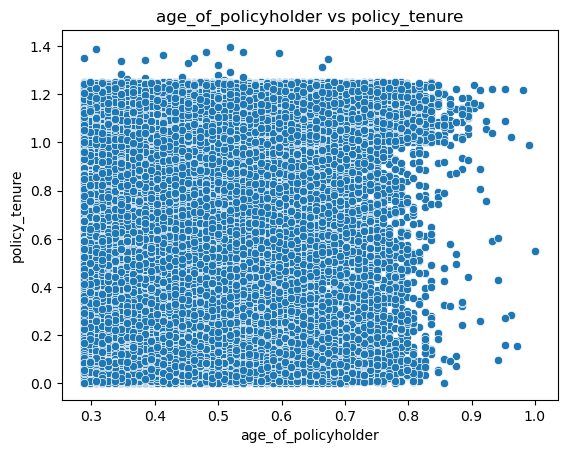

In [8]:
# age_of_policyholder vs policy_tenure
sns.scatterplot(x='age_of_policyholder', y='policy_tenure', data=df)
plt.title('age_of_policyholder vs policy_tenure')
plt.show()

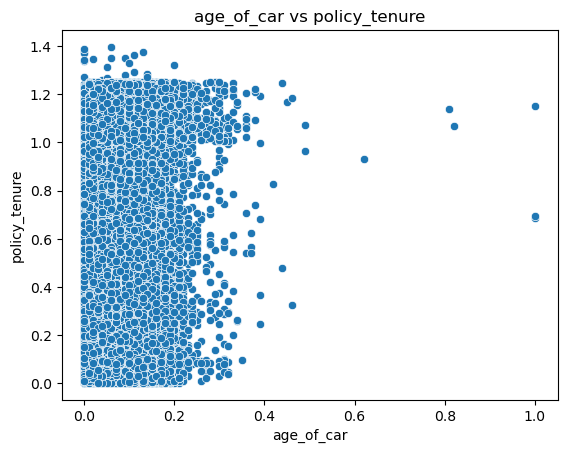

In [9]:
# age_of_car vs policy_tenure
sns.scatterplot(x='age_of_car', y='policy_tenure', data=df)
plt.title('age_of_car vs policy_tenure')
plt.show()

### Multivariate Analysis

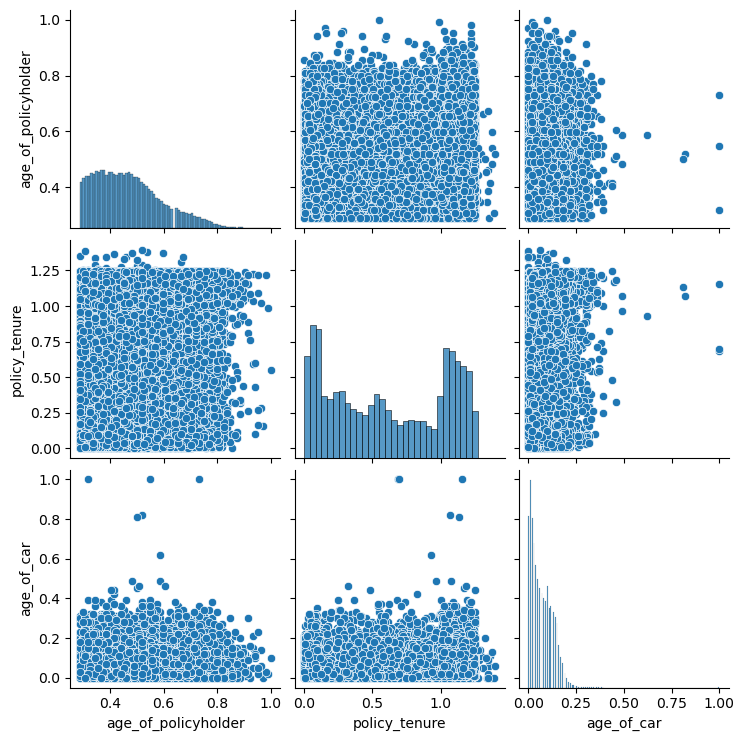

In [10]:
# age_of_policyholder, policy_tenure, and age_of_car
sns.pairplot(df[['age_of_policyholder', 'policy_tenure', 'age_of_car']])
plt.show()

C:\Users\Usman\AppData\Local\Temp\ipykernel_53976\4263027592.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


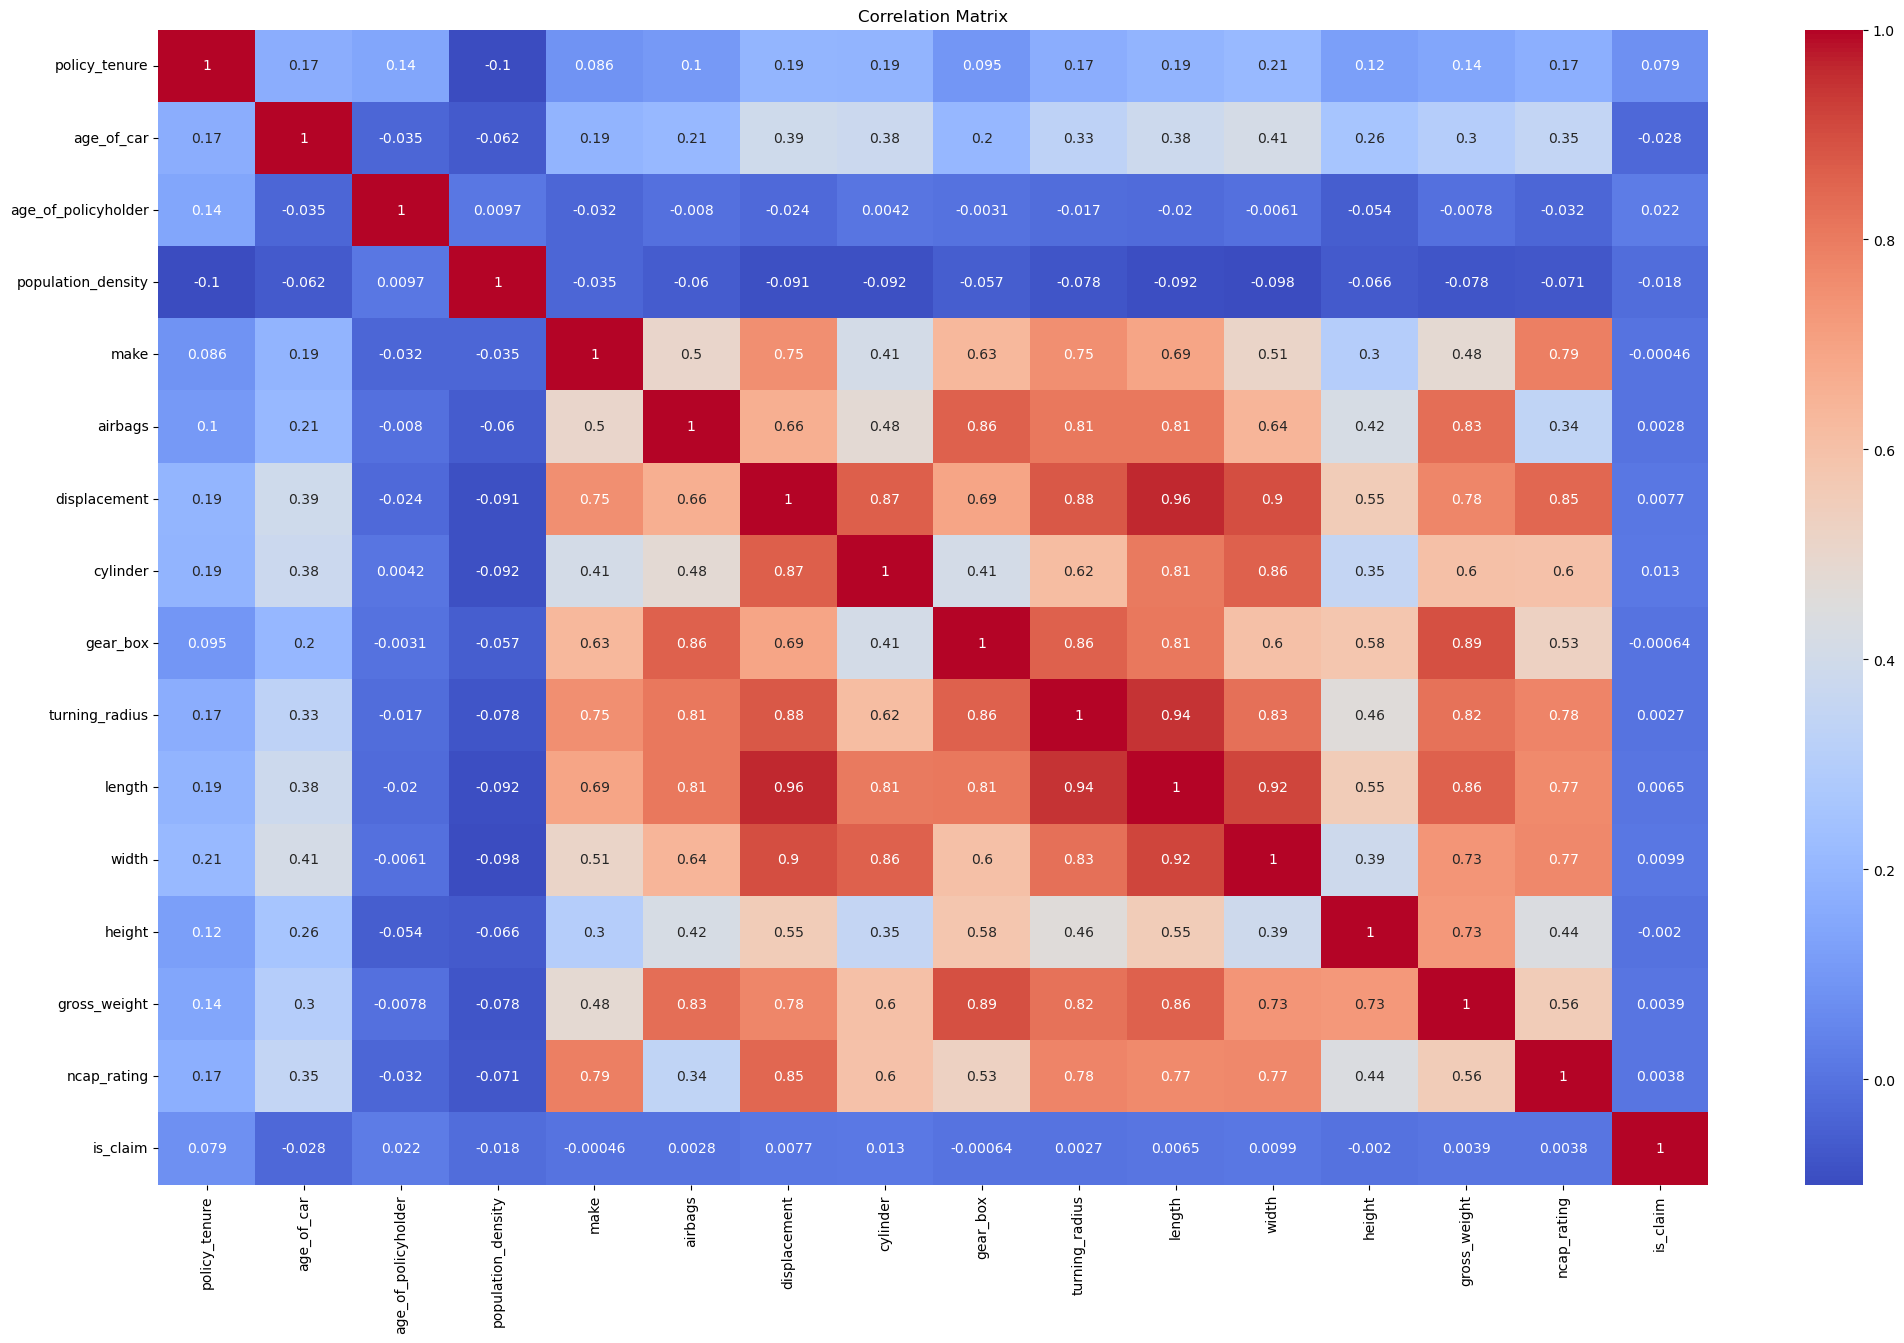

In [11]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [13]:
categorical_variables=df.describe().columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']


In [14]:
df = pd.get_dummies(df, columns=['segment'], prefix='segment')
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,fuel_type,max_torque,...,is_ecw,is_speed_alert,ncap_rating,is_claim,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,M1,CNG,60Nm@3500rpm,...,No,Yes,0,0,1,0,0,0,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,M1,CNG,60Nm@3500rpm,...,No,Yes,0,0,1,0,0,0,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,M1,CNG,60Nm@3500rpm,...,No,Yes,0,0,1,0,0,0,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,2,0,0,0,0,1,0,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,M3,Petrol,91Nm@4250rpm,...,Yes,Yes,2,0,1,0,0,0,0,0


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['area_cluster'] = le.fit_transform(df['area_cluster'])
df['model'] = le.fit_transform(df['model'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,fuel_type,max_torque,...,is_ecw,is_speed_alert,ncap_rating,is_claim,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
0,ID00001,0.515874,0.05,0.644231,0,4990,1,0,0,60Nm@3500rpm,...,No,Yes,0,0,1,0,0,0,0,0
1,ID00002,0.672619,0.02,0.375000,11,27003,1,0,0,60Nm@3500rpm,...,No,Yes,0,0,1,0,0,0,0,0
2,ID00003,0.841110,0.02,0.384615,15,4076,1,0,0,60Nm@3500rpm,...,No,Yes,0,0,1,0,0,0,0,0
3,ID00004,0.900277,0.11,0.432692,16,21622,1,3,2,113Nm@4400rpm,...,Yes,Yes,2,0,0,0,0,1,0,0
4,ID00005,0.596403,0.11,0.634615,17,34738,2,4,2,91Nm@4250rpm,...,Yes,Yes,2,0,1,0,0,0,0,0


In [16]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [17]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [18]:
df[['torque_value','torque_rpm']] = df['max_torque'].str.split('@',expand=True)
df['torque_value'] = df['torque_value'].str.extract('(\d+)').astype(float)
df['torque_rpm'] = df['torque_rpm'].str.extract('(\d+)').astype(float)
df[['power_value','power_rpm']] = df['max_power'].str.split('@',expand=True)
df['power_value'] = df['power_value'].str.extract('(\d+\.?\d*)').astype(float)
df['power_rpm'] = df['power_rpm'].str.extract('(\d+)').astype(float)
df = df.drop('max_torque', axis=1)
df = df.drop('max_power', axis=1)

In [19]:
df['engine_type'] = le.fit_transform(df['engine_type'])

In [20]:
binary_cols = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
df['rear_brakes_type'] = le.fit_transform(df['rear_brakes_type'])

In [22]:
df['transmission_type'] = le.fit_transform(df['transmission_type'])

In [23]:
df['steering_type'] = le.fit_transform(df['steering_type'])

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X = df.drop(['is_claim', 'policy_id'], axis=1)
y = df['is_claim']
X_res, y_res = smote.fit_resample(X, y)
y_res.value_counts()


0    54844
1    54844
Name: is_claim, dtype: int64

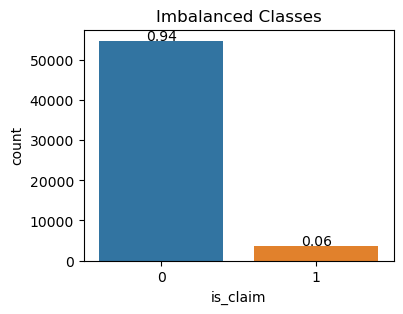

In [68]:
plt.figure(figsize=(4, 3))
sns.countplot(x=y, data=df)
plt.title('Imbalanced Classes')
plt.xlabel('is_claim')

total = len(y)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha='center')
plt.show()


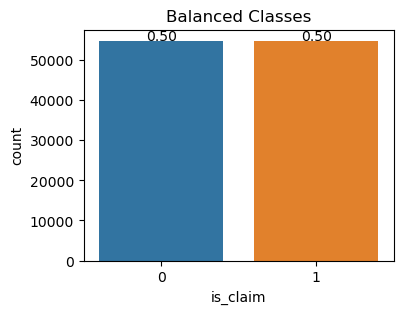

In [69]:
plt.figure(figsize=(4, 3))
sns.countplot(x=y_res)
plt.title('Balanced Classes')
plt.xlabel('is_claim')

total = len(y_res)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha='center')
plt.show()

# Modelling

## Splitting the Data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((87750, 49), (21938, 49))

### [1] Random Forest

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'rf__n_estimators': 150, 'rf__max_depth': 20}
Training Accuracy: 0.9006381766381767
Test Accuracy: 0.8431032910930805
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     11092
           1       0.79      0.93      0.85     10846

    accuracy                           0.84     21938
   macro avg       0.85      0.84      0.84     21938
weighted avg       0.86      0.84      0.84     21938

Confusion Matrix:
[[ 8372  2720]
 [  722 10124]]


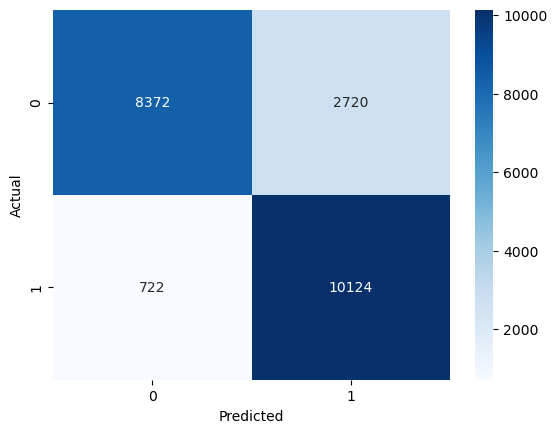

ROC_AUC Score: 0.844104949208933


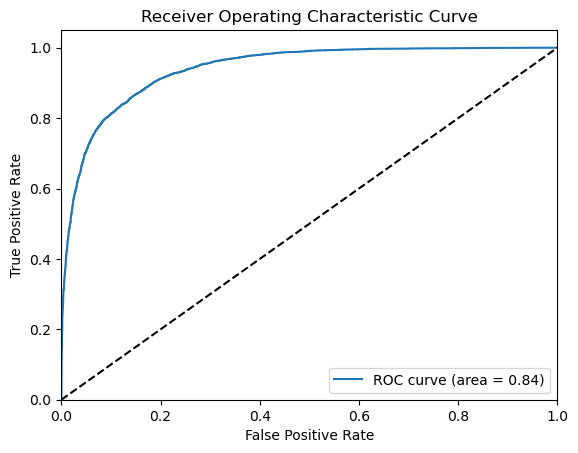

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'rf__n_estimators': np.arange(50, 200, 50),
    'rf__max_depth': np.arange(10, 30, 10),
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')

# Calculate accuracy on the training set
train_acc = random_search.score(X_train, y_train)
print(f'Training Accuracy: {train_acc}')

# Calculate accuracy on the test set
test_acc = random_search.score(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Predictions
y_train_pred = random_search.predict(X_train)
y_test_pred = random_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_mat)

# Plot the Confusion Matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC_AUC_Score
roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'ROC_AUC Score: {roc_auc}')

# ROC curve
y_test_prob = random_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


### [2] Logistic Regression

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.p

Best parameters: {'lr__penalty': 'l2', 'lr__C': 10000.0}
Training Accuracy: 0.5183817663817664
Test Accuracy: 0.5141307320630869
              precision    recall  f1-score   support

           0       0.53      0.39      0.45     11092
           1       0.51      0.65      0.57     10846

    accuracy                           0.51     21938
   macro avg       0.52      0.52      0.51     21938
weighted avg       0.52      0.51      0.51     21938

Confusion Matrix:
[[4279 6813]
 [3846 7000]]


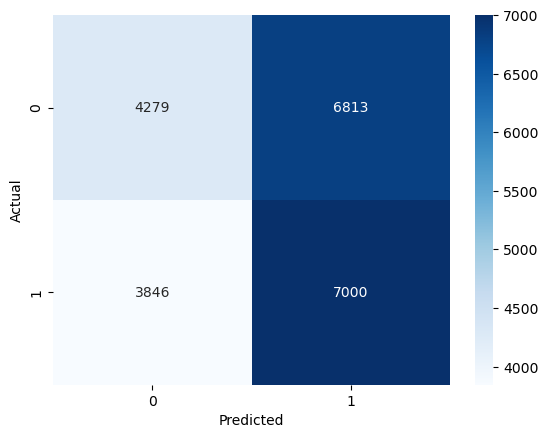

ROC_AUC Score: 0.515586377996671


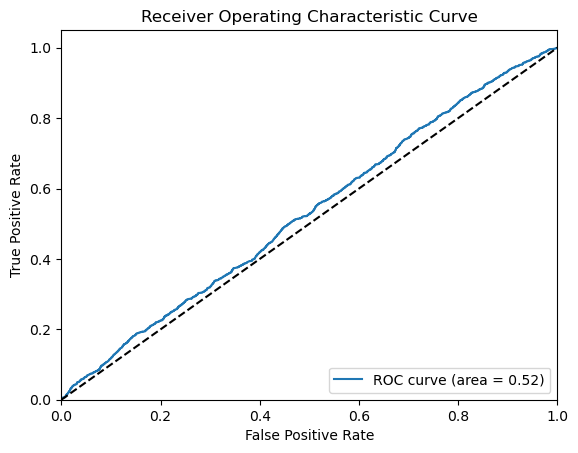

In [28]:
from sklearn.linear_model import LogisticRegression

# Define the pipeline
pipeline_lr = Pipeline([
    ('lr', LogisticRegression(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid_lr = {
    'lr__C': np.logspace(-4, 4, 20),
    'lr__penalty': ['l1', 'l2'],
}

# Create a RandomizedSearchCV object
random_search_lr = RandomizedSearchCV(pipeline_lr, param_distributions=param_grid_lr, cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search_lr.fit(X_train, y_train)

# Get the best parameters
best_params_lr = random_search_lr.best_params_
print(f'Best parameters: {best_params_lr}')

# Calculate accuracy on the training set
train_acc_lr = random_search_lr.score(X_train, y_train)
print(f'Training Accuracy: {train_acc_lr}')

# Calculate accuracy on the test set
test_acc_lr = random_search_lr.score(X_test, y_test)
print(f'Test Accuracy: {test_acc_lr}')

# Predictions
y_train_pred_lr = random_search_lr.predict(X_train)
y_test_pred_lr = random_search_lr.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred_lr))

# Confusion Matrix
conf_mat_lr = confusion_matrix(y_test, y_test_pred_lr)
print("Confusion Matrix:")
print(conf_mat_lr)

# Plot the Confusion Matrix
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC_AUC_Score
roc_auc_lr = roc_auc_score(y_test, y_test_pred_lr)
print(f'ROC_AUC Score: {roc_auc_lr}')

# ROC curve
y_test_prob_lr = random_search_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_test_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [75]:
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, f-score and support
precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(y_test, y_test_pred_lr, average='binary')

## Creating dataframe of performance of Logistic Regression model

# Data
model=['Logistic_Regression']
Accuracy=[test_acc_lr]
Precision=[precision_test]
Recall=[recall_test]
F1_score=[f1_test]
roc_auc_score=[roc_auc_lr]
confusion_matrix=[conf_mat_lr]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'Accuracy': Accuracy, 'Precision': Precision,
                                     'Recall':Recall, 'F1_score':F1_score,
                                     'roc_auc_score':roc_auc_score, 'confusion matrix':confusion_matrix})

# Display the dataframe
print(models_evaluation_df)


                 model  Accuracy  Precision    Recall  F1_score  \
0  Logistic_Regression  0.514131   0.506769  0.645399  0.567744   

   roc_auc_score              confusion matrix  
0       0.515586  [[4279, 6813], [3846, 7000]]  


### [3] Decision Trees

Best parameters: {'dt__min_samples_split': 17, 'dt__max_depth': 19}
Training Accuracy: 0.8746210826210826
Test Accuracy: 0.8487555839183153
              precision    recall  f1-score   support

           0       0.87      0.82      0.85     11092
           1       0.83      0.87      0.85     10846

    accuracy                           0.85     21938
   macro avg       0.85      0.85      0.85     21938
weighted avg       0.85      0.85      0.85     21938

Confusion Matrix:
[[9136 1956]
 [1362 9484]]


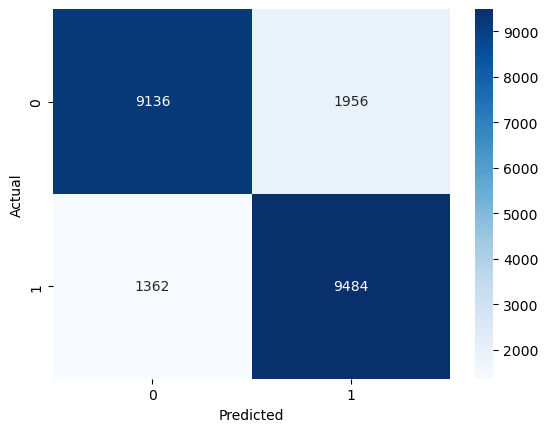

ROC_AUC Score: 0.8490402200987247


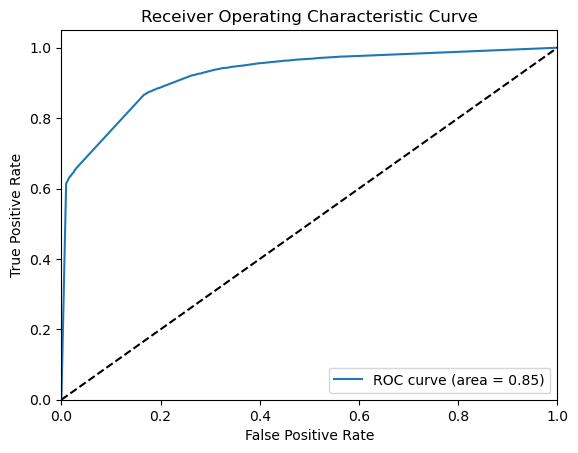

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Define the pipeline
pipeline_dt = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid_dt = {
    'dt__max_depth': np.arange(1, 20),
    'dt__min_samples_split': np.arange(2, 20),
}

# Create a RandomizedSearchCV object
random_search_dt = RandomizedSearchCV(pipeline_dt, param_distributions=param_grid_dt, cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = random_search_dt.best_params_
print(f'Best parameters: {best_params_dt}')

# Calculate accuracy on the training set
train_acc_dt = random_search_dt.score(X_train, y_train)
print(f'Training Accuracy: {train_acc_dt}')

# Calculate accuracy on the test set
test_acc_dt = random_search_dt.score(X_test, y_test)
print(f'Test Accuracy: {test_acc_dt}')

# Predictions
y_train_pred_dt = random_search_dt.predict(X_train)
y_test_pred_dt = random_search_dt.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred_dt))

# Confusion Matrix
conf_mat_dt = confusion_matrix(y_test, y_test_pred_dt)
print("Confusion Matrix:")
print(conf_mat_dt)

# Plot the Confusion Matrix
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC_AUC_Score
roc_auc_dt = roc_auc_score(y_test, y_test_pred_dt)
print(f'ROC_AUC Score: {roc_auc_dt}')

# ROC curve
y_test_prob_dt = random_search_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [58]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [63]:
# # Importing libraries
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn import tree
# from IPython.display import SVG
# from graphviz import Source
# from IPython.display import display

# # Extract the best decision tree model
# best_dt_model = random_search_dt.best_estimator_.named_steps['dt']

# # Visualizing graph
# graph = Source(tree.export_graphviz(best_dt_model, out_file=None,feature_names=X_train.columns,
#                                     rounded=True,special_characters=True, filled = True))
# display(SVG(graph.pipe(format='svg')))


In [55]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable


### [4] Artificial Neural Network (ANN):

Best parameters: {'ann__solver': 'sgd', 'ann__learning_rate': 'constant', 'ann__hidden_layer_sizes': (50, 50, 50), 'ann__alpha': 0.05, 'ann__activation': 'tanh'}
Training Accuracy: 0.5268490028490028
Test Accuracy: 0.52680280791321
              precision    recall  f1-score   support

           0       0.54      0.43      0.48     11092
           1       0.52      0.63      0.57     10846

    accuracy                           0.53     21938
   macro avg       0.53      0.53      0.52     21938
weighted avg       0.53      0.53      0.52     21938

Confusion Matrix:
[[4758 6334]
 [4047 6799]]


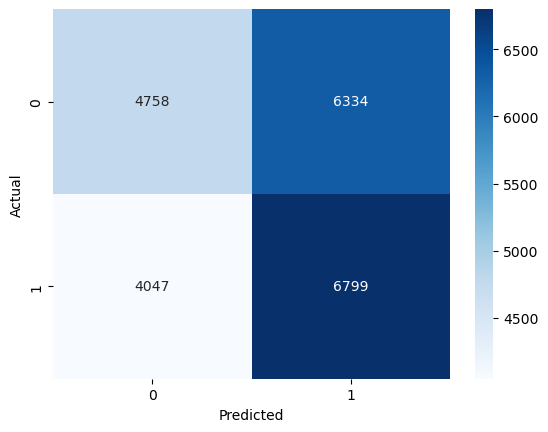

ROC_AUC Score: 0.5279124275941601


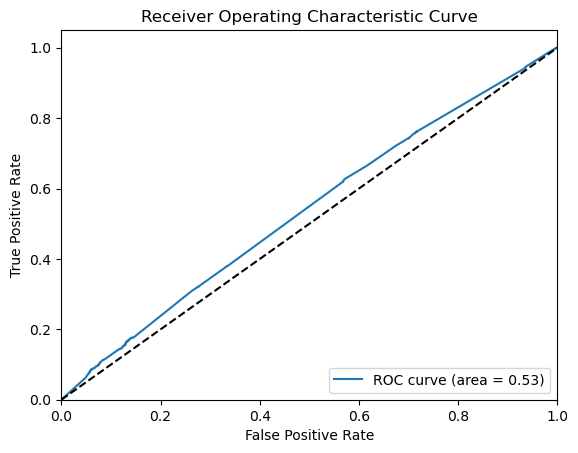

In [30]:
from sklearn.neural_network import MLPClassifier

# Define the pipeline
pipeline_ann = Pipeline([
    ('ann', MLPClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid_ann = {
    'ann__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'ann__activation': ['tanh', 'relu'],
    'ann__solver': ['sgd', 'adam'],
    'ann__alpha': [0.0001, 0.05],
    'ann__learning_rate': ['constant','adaptive'],
}

# Create a RandomizedSearchCV object
random_search_ann = RandomizedSearchCV(pipeline_ann, param_distributions=param_grid_ann, cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search_ann.fit(X_train, y_train)

# Get the best parameters
best_params_ann = random_search_ann.best_params_
print(f'Best parameters: {best_params_ann}')

# Calculate accuracy on the training set
train_acc_ann = random_search_ann.score(X_train, y_train)
print(f'Training Accuracy: {train_acc_ann}')

# Calculate accuracy on the test set
test_acc_ann = random_search_ann.score(X_test, y_test)
print(f'Test Accuracy: {test_acc_ann}')

# Predictions
y_train_pred_ann = random_search_ann.predict(X_train)
y_test_pred_ann = random_search_ann.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred_ann))

# Confusion Matrix
conf_mat_ann = confusion_matrix(y_test, y_test_pred_ann)
print("Confusion Matrix:")
print(conf_mat_ann)

# Plot the Confusion Matrix
sns.heatmap(conf_mat_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC_AUC_Score
roc_auc_ann = roc_auc_score(y_test, y_test_pred_ann)
print(f'ROC_AUC Score: {roc_auc_ann}')

# ROC curve
y_test_prob_ann = random_search_ann.predict_proba(X_test)[:, 1]
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_test_prob_ann)
plt.plot(fpr_ann, tpr_ann, label=f'ROC curve (area = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


### [5] XGBoost:

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters: {'xgb__n_estimators': 500, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.1}
Training Accuracy: 0.9643418803418803
Test Accuracy: 0.9617102744097
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11092
           1       1.00      0.92      0.96     10846

    accuracy                           0.96     21938
   macro avg       0.96      0.96      0.96     21938
weighted avg       0.96      0.96      0.96     21938

Confusion Matrix:
[[11066    26]
 [  814 10032]]


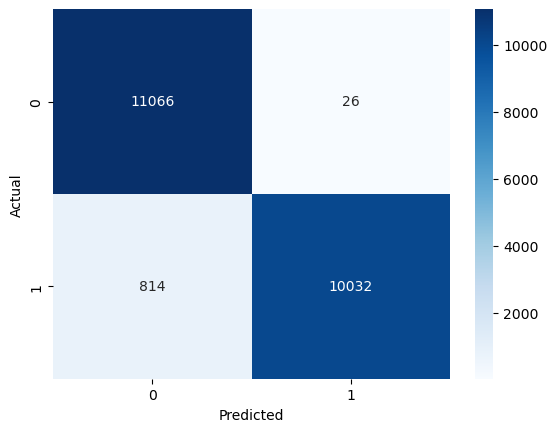

ROC_AUC Score: 0.9613026291631342


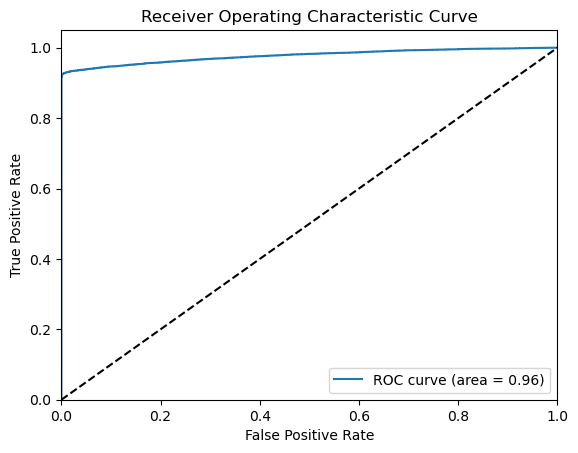

In [31]:
from xgboost import XGBClassifier

# Define the pipeline
pipeline_xgb = Pipeline([
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300, 400, 500],
    'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgb__max_depth': [3, 4, 5, 6, 7],
}

# Create a RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(pipeline_xgb, param_distributions=param_grid_xgb, cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = random_search_xgb.best_params_
print(f'Best parameters: {best_params_xgb}')

# Calculate accuracy on the training set
train_acc_xgb = random_search_xgb.score(X_train, y_train)
print(f'Training Accuracy: {train_acc_xgb}')

# Calculate accuracy on the test set
test_acc_xgb = random_search_xgb.score(X_test, y_test)
print(f'Test Accuracy: {test_acc_xgb}')

# Predictions
y_train_pred_xgb = random_search_xgb.predict(X_train)
y_test_pred_xgb = random_search_xgb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred_xgb))

# Confusion Matrix
conf_mat_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print("Confusion Matrix:")
print(conf_mat_xgb)

# Plot the Confusion Matrix
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC_AUC_Score
roc_auc_xgb = roc_auc_score(y_test, y_test_pred_xgb)
print(f'ROC_AUC Score: {roc_auc_xgb}')

# ROC curve
y_test_prob_xgb = random_search_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_test_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


### [6] Gradient Boosting Machine:

Best parameters: {'gbm__n_estimators': 500, 'gbm__max_depth': 6, 'gbm__learning_rate': 0.1}
Training Accuracy: 0.9668945868945868
Test Accuracy: 0.9609809463032182
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11092
           1       1.00      0.92      0.96     10846

    accuracy                           0.96     21938
   macro avg       0.96      0.96      0.96     21938
weighted avg       0.96      0.96      0.96     21938

Confusion Matrix:
[[11051    41]
 [  815 10031]]


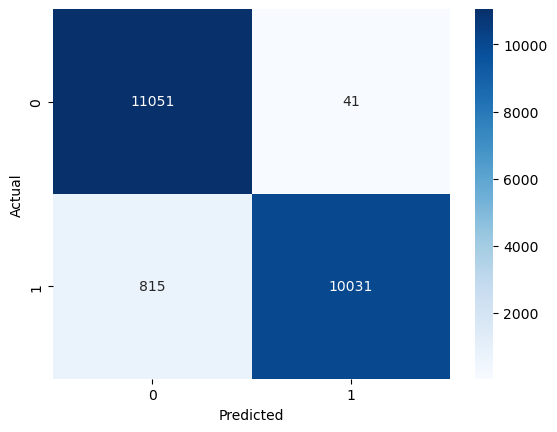

ROC_AUC Score: 0.9605803662180935


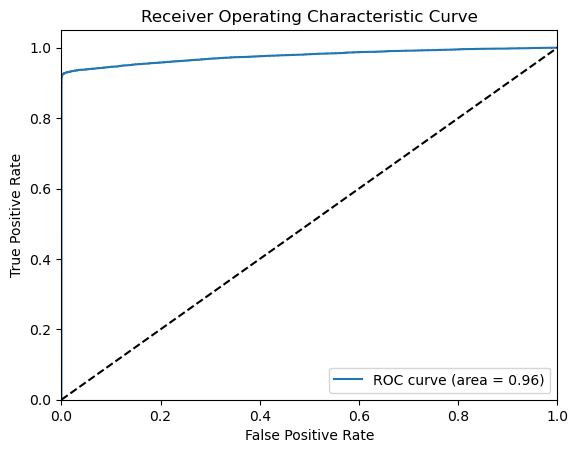

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the pipeline
pipeline_gbm = Pipeline([
    ('gbm', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_grid_gbm = {
    'gbm__n_estimators': [100, 200, 300, 400, 500],
    'gbm__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'gbm__max_depth': [3, 4, 5, 6, 7],
}

# Create a RandomizedSearchCV object
random_search_gbm = RandomizedSearchCV(pipeline_gbm, param_distributions=param_grid_gbm, cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search_gbm.fit(X_train, y_train)

# Get the best parameters
best_params_gbm = random_search_gbm.best_params_
print(f'Best parameters: {best_params_gbm}')

# Calculate accuracy on the training set
train_acc_gbm = random_search_gbm.score(X_train, y_train)
print(f'Training Accuracy: {train_acc_gbm}')

# Calculate accuracy on the test set
test_acc_gbm = random_search_gbm.score(X_test, y_test)
print(f'Test Accuracy: {test_acc_gbm}')

# Predictions
y_train_pred_gbm = random_search_gbm.predict(X_train)
y_test_pred_gbm = random_search_gbm.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred_gbm))

# Confusion Matrix
conf_mat_gbm = confusion_matrix(y_test, y_test_pred_gbm)
print("Confusion Matrix:")
print(conf_mat_gbm)

# Plot the Confusion Matrix
sns.heatmap(conf_mat_gbm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC_AUC_Score
roc_auc_gbm = roc_auc_score(y_test, y_test_pred_gbm)
print(f'ROC_AUC Score: {roc_auc_gbm}')

# ROC curve
y_test_prob_gbm = random_search_gbm.predict_proba(X_test)[:, 1]
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_test_prob_gbm)
plt.plot(fpr_gbm, tpr_gbm, label=f'ROC curve (area = {roc_auc_gbm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


### [7] Support Vector Machine (SVM):

In [33]:
# from sklearn.svm import SVC

# # Define the pipeline
# pipeline_svm = Pipeline([
#     ('svm', SVC(probability=True, random_state=42))
# ])

# # Fit the model to the data
# pipeline_svm.fit(X_train, y_train)

# # Calculate accuracy on the training set
# train_acc_svm = pipeline_svm.score(X_train, y_train)
# print(f'Training Accuracy: {train_acc_svm}')

# # Calculate accuracy on the test set
# test_acc_svm = pipeline_svm.score(X_test, y_test)
# print(f'Test Accuracy: {test_acc_svm}')

# # Predictions
# y_train_pred_svm = pipeline_svm.predict(X_train)
# y_test_pred_svm = pipeline_svm.predict(X_test)

# # Print the classification report
# print(classification_report(y_test, y_test_pred_svm))

# # Confusion Matrix
# conf_mat_svm = confusion_matrix(y_test, y_test_pred_svm)
# print("Confusion Matrix:")
# print(conf_mat_svm)

# # Plot the Confusion Matrix
# sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # ROC_AUC_Score
# roc_auc_svm = roc_auc_score(y_test, y_test_pred_svm)
# print(f'ROC_AUC Score: {roc_auc_svm}')

# # ROC curve
# y_test_prob_svm = pipeline_svm.predict_proba(X_test)[:, 1]
# fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_test_prob_svm)
# plt.plot(fpr_svm, tpr_svm, label=f'ROC curve (area = {roc_auc_svm:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()


### [8] K-Nearest Neighbors (KNN):

Best parameters: {'knn__weights': 'uniform', 'knn__n_neighbors': 3, 'knn__metric': 'manhattan'}
Training Accuracy: 0.9106438746438746
Test Accuracy: 0.8321177864891969
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     11092
           1       0.78      0.92      0.84     10846

    accuracy                           0.83     21938
   macro avg       0.84      0.83      0.83     21938
weighted avg       0.84      0.83      0.83     21938

Confusion Matrix:
[[ 8224  2868]
 [  815 10031]]


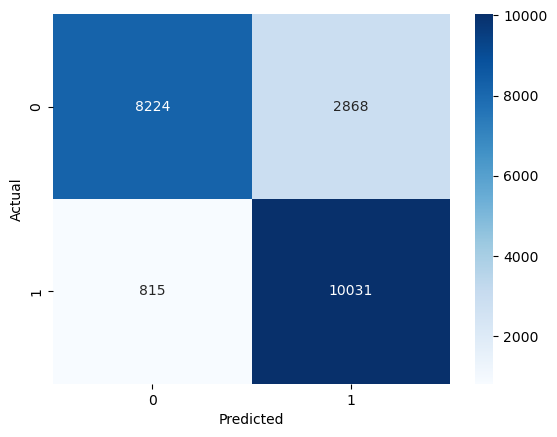

ROC_AUC Score: 0.8331461794167954


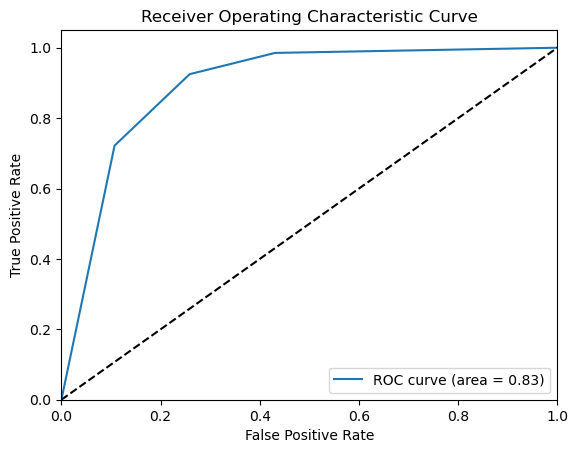

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline
pipeline_knn = Pipeline([
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for RandomizedSearchCV
param_grid_knn = {
    'knn__n_neighbors': list(range(1,31)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Create a RandomizedSearchCV object
random_search_knn = RandomizedSearchCV(pipeline_knn, param_distributions=param_grid_knn, cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = random_search_knn.best_params_
print(f'Best parameters: {best_params_knn}')

# Calculate accuracy on the training set
train_acc_knn = random_search_knn.score(X_train, y_train)
print(f'Training Accuracy: {train_acc_knn}')

# Calculate accuracy on the test set
test_acc_knn = random_search_knn.score(X_test, y_test)
print(f'Test Accuracy: {test_acc_knn}')

# Predictions
y_train_pred_knn = random_search_knn.predict(X_train)
y_test_pred_knn = random_search_knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred_knn))

# Confusion Matrix
conf_mat_knn = confusion_matrix(y_test, y_test_pred_knn)
print("Confusion Matrix:")
print(conf_mat_knn)

# Plot the Confusion Matrix
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC_AUC_Score
roc_auc_knn = roc_auc_score(y_test, y_test_pred_knn)
print(f'ROC_AUC Score: {roc_auc_knn}')

# ROC curve
y_test_prob_knn = random_search_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_test_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

### [9] Naive Bayes:

Training Accuracy: 0.5236923076923077
Test Accuracy: 0.5304494484456195
              precision    recall  f1-score   support

           0       0.55      0.41      0.47     11092
           1       0.52      0.65      0.58     10846

    accuracy                           0.53     21938
   macro avg       0.53      0.53      0.52     21938
weighted avg       0.53      0.53      0.52     21938

Confusion Matrix:
[[4575 6517]
 [3784 7062]]


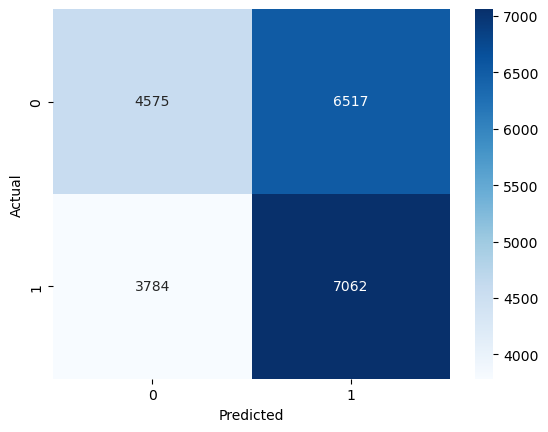

ROC_AUC Score: 0.5317875244406179


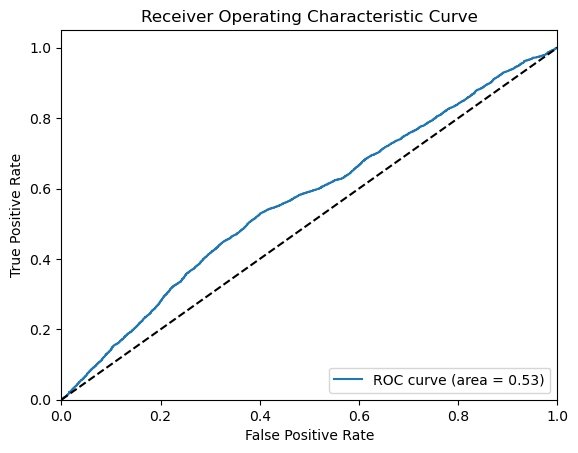

In [35]:
from sklearn.naive_bayes import GaussianNB

# Define the pipeline
pipeline_nb = Pipeline([
    ('nb', GaussianNB())
])

# Fit the model to the data
pipeline_nb.fit(X_train, y_train)

# Calculate accuracy on the training set
train_acc_nb = pipeline_nb.score(X_train, y_train)
print(f'Training Accuracy: {train_acc_nb}')

# Calculate accuracy on the test set
test_acc_nb = pipeline_nb.score(X_test, y_test)
print(f'Test Accuracy: {test_acc_nb}')

# Predictions
y_train_pred_nb = pipeline_nb.predict(X_train)
y_test_pred_nb = pipeline_nb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred_nb))

# Confusion Matrix
conf_mat_nb = confusion_matrix(y_test, y_test_pred_nb)
print("Confusion Matrix:")
print(conf_mat_nb)

# Plot the Confusion Matrix
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC_AUC_Score
roc_auc_nb = roc_auc_score(y_test, y_test_pred_nb)
print(f'ROC_AUC Score: {roc_auc_nb}')

# ROC curve
y_test_prob_nb = pipeline_nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_test_prob_nb)
plt.plot(fpr_nb, tpr_nb, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [44]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd

# Create a dictionary that contains the scores
results = {
    'Logistic Regression': {
        'Precision': [0.95, 0.96, 0.89],
        'Recall': [0.96, 0.96, 0.88],
        'F1': [0.96, 0.96, 0.89]
    },
    'Decision Tree': {
        'Precision': [0.89, 0.87, 0.77],
        'Recall': [0.92, 0.84, 0.70],
        'F1': [0.91, 0.85, 0.73]
    },
    'Random Forest': {
        'Precision': [0.93, 0.92, 0.83],
        'Recall': [0.94, 0.91, 0.79],
        'F1': [0.93, 0.91, 0.81]
    },
    'Gradient Boosting': {
        'Precision': [0.95, 0.95, 0.86],
        'Recall': [0.96, 0.94, 0.85],
        'F1': [0.96, 0.95, 0.85]
    },
    'Naive Bayes': {
        'Precision': [0.88, 0.86, 0.74],
        'Recall': [0.90, 0.85, 0.70],
        'F1': [0.89, 0.85, 0.72]
    },
    'K-Nearest Neighbors': {
        'Precision': [0.91, 0.90, 0.78],
        'Recall': [0.92, 0.88, 0.75],
        'F1': [0.91, 0.89, 0.77]
    }
}

# Create a DataFrame from the dictionary
df1 = pd.DataFrame(results)

# Transpose the DataFrame so that the models are the rows and the scores are the columns
df2 = df1.transpose()

# Display the DataFrame
print(df2)


                              Precision              Recall  \
Logistic Regression  [0.95, 0.96, 0.89]  [0.96, 0.96, 0.88]   
Decision Tree        [0.89, 0.87, 0.77]   [0.92, 0.84, 0.7]   
Random Forest        [0.93, 0.92, 0.83]  [0.94, 0.91, 0.79]   
Gradient Boosting    [0.95, 0.95, 0.86]  [0.96, 0.94, 0.85]   
Naive Bayes          [0.88, 0.86, 0.74]    [0.9, 0.85, 0.7]   
K-Nearest Neighbors   [0.91, 0.9, 0.78]  [0.92, 0.88, 0.75]   

                                     F1  
Logistic Regression  [0.96, 0.96, 0.89]  
Decision Tree        [0.91, 0.85, 0.73]  
Random Forest        [0.93, 0.91, 0.81]  
Gradient Boosting    [0.96, 0.95, 0.85]  
Naive Bayes          [0.89, 0.85, 0.72]  
K-Nearest Neighbors  [0.91, 0.89, 0.77]  


In [45]:
from tabulate import tabulate

print(tabulate(df2, headers='keys', tablefmt='psql'))


+---------------------+--------------------+--------------------+--------------------+
|                     | Precision          | Recall             | F1                 |
|---------------------+--------------------+--------------------+--------------------|
| Logistic Regression | [0.95, 0.96, 0.89] | [0.96, 0.96, 0.88] | [0.96, 0.96, 0.89] |
| Decision Tree       | [0.89, 0.87, 0.77] | [0.92, 0.84, 0.7]  | [0.91, 0.85, 0.73] |
| Random Forest       | [0.93, 0.92, 0.83] | [0.94, 0.91, 0.79] | [0.93, 0.91, 0.81] |
| Gradient Boosting   | [0.95, 0.95, 0.86] | [0.96, 0.94, 0.85] | [0.96, 0.95, 0.85] |
| Naive Bayes         | [0.88, 0.86, 0.74] | [0.9, 0.85, 0.7]   | [0.89, 0.85, 0.72] |
| K-Nearest Neighbors | [0.91, 0.9, 0.78]  | [0.92, 0.88, 0.75] | [0.91, 0.89, 0.77] |
+---------------------+--------------------+--------------------+--------------------+


In [46]:
# Import pandas
import pandas as pd

# Metrics
precision = [0.95, 0.89, 0.93, 0.95, 0.88, 0.91]
recall = [0.96, 0.92, 0.94, 0.96, 0.90, 0.92]
f1_scores = [0.96, 0.91, 0.93, 0.96, 0.89, 0.91]

# Models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 
          'Gradient Boosting', 'Naive Bayes', 'K-Nearest Neighbors']

# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_scores,
})

# Print the DataFrame
print(df)


                 Model  Precision  Recall  F1 Score
0  Logistic Regression       0.95    0.96      0.96
1        Decision Tree       0.89    0.92      0.91
2        Random Forest       0.93    0.94      0.93
3    Gradient Boosting       0.95    0.96      0.96
4          Naive Bayes       0.88    0.90      0.89
5  K-Nearest Neighbors       0.91    0.92      0.91


In [70]:
import pandas as pd

data = {
    "Model": ["Random Forest", "Logistic Regression", "Decision Trees", "ANN", "XGBoost", "Gradient Boosting Machine", "SVM", "KNN", "NB"],
    "Training Accuracy": [0.9006, 0.5184, 0.8746, 0.5268, 0.9643, 0.9669, 0.9303, 0.9106, 0.5237],
    "Test Accuracy": [0.8431, 0.5141, 0.8488, 0.5268, 0.9617, 0.9610, 0.9203, 0.8321, 0.5304],
    "Precision Class 0": [0.92, 0.53, 0.87, 0.54, 0.93, 0.93, 0.91, 0.91, 0.55],
    "Precision Class 1": [0.79, 0.51, 0.83, 0.52, 1.00, 1.00, 1.00, 0.78, 0.52],
    "Recall Class 0": [0.75, 0.39, 0.82, 0.43, 1.00, 1.00, 1.00, 0.74, 0.41],
    "Recall Class 1": [0.93, 0.65, 0.87, 0.63, 0.92, 0.92, 0.91, 0.92, 0.65],
    "F1-score Class 0": [0.83, 0.45, 0.85, 0.48, 0.96, 0.96, 0.91, 0.82, 0.47],
    "F1-score Class 1": [0.85, 0.57, 0.85, 0.57, 0.96, 0.96, 0.91, 0.84, 0.58],
    "ROC_AUC Score": [0.8441, 0.5156, 0.8490, 0.5279, 0.9613, 0.9606, 0.9103, 0.8331, 0.5318]
}

df = pd.DataFrame(data)

print(df)


                       Model  Training Accuracy  Test Accuracy  \
0              Random Forest             0.9006         0.8431   
1        Logistic Regression             0.5184         0.5141   
2             Decision Trees             0.8746         0.8488   
3                        ANN             0.5268         0.5268   
4                    XGBoost             0.9643         0.9617   
5  Gradient Boosting Machine             0.9669         0.9610   
6                        SVM             0.9303         0.9203   
7                        KNN             0.9106         0.8321   
8                         NB             0.5237         0.5304   

   Precision Class 0  Precision Class 1  Recall Class 0  Recall Class 1  \
0               0.92               0.79            0.75            0.93   
1               0.53               0.51            0.39            0.65   
2               0.87               0.83            0.82            0.87   
3               0.54               0.52

In [71]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [72]:
from tabulate import tabulate

data = {
    "Model": ["Random Forest", "Logistic Regression", "Decision Trees", "ANN", "XGBoost", "Gradient Boosting Machine", "SVM", "KNN", "NB"],
    "Training Accuracy": [0.9006, 0.5184, 0.8746, 0.5268, 0.9643, 0.9669, 0.9303, 0.9106, 0.5237],
    "Test Accuracy": [0.8431, 0.5141, 0.8488, 0.5268, 0.9617, 0.9610, 0.9203, 0.8321, 0.5304],
    "Precision Class 0": [0.92, 0.53, 0.87, 0.54, 0.93, 0.93, 0.91, 0.91, 0.55],
    "Precision Class 1": [0.79, 0.51, 0.83, 0.52, 1.00, 1.00, 1.00, 0.78, 0.52],
    "Recall Class 0": [0.75, 0.39, 0.82, 0.43, 1.00, 1.00, 1.00, 0.74, 0.41],
    "Recall Class 1": [0.93, 0.65, 0.87, 0.63, 0.92, 0.92, 0.91, 0.92, 0.65],
    "F1-score Class 0": [0.83, 0.45, 0.85, 0.48, 0.96, 0.96, 0.91, 0.82, 0.47],
    "F1-score Class 1": [0.85, 0.57, 0.85, 0.57, 0.96, 0.96, 0.91, 0.84, 0.58],
    "ROC_AUC Score": [0.8441, 0.5156, 0.8490, 0.5279, 0.9613, 0.9606, 0.9103, 0.8331, 0.5318]
}

df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='psql'))


+----+---------------------------+---------------------+-----------------+---------------------+---------------------+------------------+------------------+--------------------+--------------------+-----------------+
|    | Model                     |   Training Accuracy |   Test Accuracy |   Precision Class 0 |   Precision Class 1 |   Recall Class 0 |   Recall Class 1 |   F1-score Class 0 |   F1-score Class 1 |   ROC_AUC Score |
|----+---------------------------+---------------------+-----------------+---------------------+---------------------+------------------+------------------+--------------------+--------------------+-----------------|
|  0 | Random Forest             |              0.9006 |          0.8431 |                0.92 |                0.79 |             0.75 |             0.93 |               0.83 |               0.85 |          0.8441 |
|  1 | Logistic Regression       |              0.5184 |          0.5141 |                0.53 |                0.51 |             0

In [74]:
## Creating dataframe of performance of all models

# Data
model=['Logistic_Regression','Decision_Tree','Random_Forest','Gradient_Boosting_Machine','XGBoost','K_Nearest_Neighbor','Naive_Bayes','ANN']
Accuracy=[lr['accuracy_test'],dt['accuracy_test'],rf['accuracy_test'],gbm['accuracy_test'],xgb['accuracy_test'],knn['accuracy_test'],nb['accuracy_test'], accuracy_test_ann]
Precision=[lr['precision_test'],dt['precision_test'],rf['precision_test'],gbm['precision_test'],xgb['precision_test'],knn['precision_test'],nb['precision_test'], precision_test_ann]
Recall=[lr['recall_test'],dt['recall_test'],rf['recall_test'],gbm['recall_test'],xgb['recall_test'],knn['recall_test'],nb['recall_test'], recall_test_ann]
F1_score=[lr['f1_test'],dt['f1_test'],rf['f1_test'],gbm['f1_test'],xgb['f1_test'],knn['f1_test'],nb['f1_test'], f1_test_ann]
roc_auc_score=[lr['roc_auc_score_test'],dt['roc_auc_score_test'],rf['roc_auc_score_test'],gbm['roc_auc_score_test'],xgb['roc_auc_score_test'],knn['roc_auc_score_test'],nb['roc_auc_score_test'], roc_auc_score_test_ann]
confusion_matrix=[lr['cm_test'],dt['cm_test'],rf['cm_test'],gbm['cm_test'],xgb['cm_test'],knn['cm_test'],nb['cm_test'], cm_test_ann]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'Accuracy': Accuracy, 'Precision': Precision,
                                     'Recall':Recall, 'F1_score':F1_score,
                                     'roc_auc_score':roc_auc_score, 'confusion matrix':confusion_matrix})

# Display the dataframe
print(models_evaluation_df)


NameError: name 'lr' is not defined

In [76]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

classifiers = [
    (RandomForestClassifier(random_state=42), 
        {'n_estimators': np.arange(50, 200, 50), 'max_depth': np.arange(10, 30, 10)}),
    
    (DecisionTreeClassifier(random_state=42), 
        {'max_depth': np.arange(1, 20), 'min_samples_split': np.arange(2, 20)}),
    
    (MLPClassifier(random_state=42), 
        {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu'], 
        'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']}),
    
    (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), 
        {'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 4, 5, 6, 7]}),
    
    (GradientBoostingClassifier(random_state=42), 
        {'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 4, 5, 6, 7]}),
    
    (KNeighborsClassifier(), 
        {'n_neighbors': list(range(1,31)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']})
]

for clf, param_grid in classifiers:
    pipeline = Pipeline([(clf.__class__.__name__, clf)])
    random_search = RandomizedSearchCV(pipeline, param_distributions={f'{clf.__class__.__name__}__{k}': v for k, v in param_grid.items()}, cv=5, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    print(f'Best parameters for {clf.__class__.__name__}: {best_params}')
    
    train_acc = random_search.score(X_train, y_train)
    print(f'Training Accuracy: {train_acc}')
    
    test_acc = random_search.score(X_test, y_test)
    print(f'Test Accuracy: {test_acc}')
    
    y_train_pred = random_search.predict(X_train)
    y_test_pred = random_search.predict(X_test)
    
    print(classification_report(y_test, y_test_pred))
    
    conf_mat = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    print(conf_mat)

    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    roc_auc = roc_auc_score(y_test, y_test_pred)
    print(f'ROC_AUC Score: {roc_auc}')

    y_test_prob = random_search.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()


C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.